In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import norm

import numpy as np

import scipy
from statsmodels.stats.weightstats import *


In [37]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Task 4

In [40]:
mu=9.5
X_=9.57
S=0.4
n=160
# Считаем T критерий
z=(X_-mu)/(S/sqrt(n))
# Вычисляем уровень значимости
round(2*(1-norm.cdf(z)),4)
#0.0269

0.0269

## Task 6

In [4]:
data=pd.read_csv('diamonds.txt',sep='\t')
data.head()
y=data.price
X=data.drop('price', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

In [6]:
len(X_test)

13485

In [7]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [8]:
y_pred_lr=lr.predict(X_test)
y_pred_rf=rf.predict(X_test)
print ("MAE_lr=",mean_absolute_error(y_test, y_pred_lr))
print ("MAE_rf=",mean_absolute_error(y_test, y_pred_rf))

MAE_lr= 890.376400429
MAE_rf= 804.702882475


In [9]:
abs_lr= abs(y_pred_lr-y_test)
abs_rf= abs(y_pred_rf-y_test)

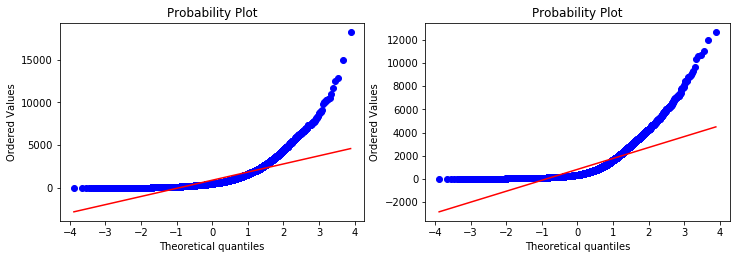

In [10]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(abs_lr, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(abs_rf, dist="norm", plot=pylab)
pylab.show()

In [12]:
scipy.stats.ttest_rel(abs_lr, abs_rf)

Ttest_relResult(statistic=12.745056775181803, pvalue=5.4286548181958855e-37)

In [46]:
cm=DescrStatsW(abs_lr - abs_rf).tconfint_mean()
print( "95%% confidence interval: [%f, %f]" %cm)

95% confidence interval: [72.497266, 98.849770]


In [47]:
round(cm[0],2)

72.5